# *Western Blot-BCA Data Analysis*

The point of the BCA assay is to measure the protein concentrations of cell pellet samples.

*Overall:* Obtain the y-values to create a standard curve to be used as a calibration curve between raw data to protein values.

Given an excel file with raw data values, be able to open the Excel sheet with the raw data values. Make a standard curve with a line of best fit (the slope and y-intercept will be used to convert the values in protein values). I use this a lot in my lab--I basically take 6 values from a spreadsheet and I use that to calculate linear regression. 

Future directions for the project (because I don't know how to code it yet):
* add user input to be able to label each data point with a sample name
* figure out a way to add the new protein values back into the original excel sheet so identification of the new values is clear
* figure out how to do calculations on all the data and not just single rows

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#reads in a table as a dataframe
df = pd.read_excel("3 Oct 2018.pda.xlsx")
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.4176,0.1080,0.6713,0.8704,1.3649,0.6280,0.9206,0.0517,0.7585,1.1370,1.1229,0.8319
1,0.9647,0.0805,0.0494,1.5806,0.0471,0.0660,0.1639,0.2822,0.4700,0.8238,1.3752,0.0465
2,0.2493,0.2421,0.2338,0.2290,0.2459,0.2539,0.6874,0.6873,0.6819,0.4532,0.4467,0.4642
3,0.6167,0.5833,0.6016,0.3597,0.3532,0.3609,0.2904,0.3193,0.3062,0.5150,0.5140,0.5244
4,0.0719,0.0473,0.0481,0.0486,0.0492,0.0508,0.0500,0.0550,0.0476,0.0475,0.0475,0.0474
5,0.0471,0.0486,0.0472,0.0479,0.0497,0.0476,0.0476,0.0512,0.0496,0.0472,0.0495,0.0471
6,0.0473,0.0477,0.0540,0.0476,0.0485,0.0501,0.0474,0.0476,0.0475,0.0559,0.0471,0.0474
7,0.0478,0.0474,0.0485,0.0487,0.0468,0.0480,0.0468,0.0470,0.0492,0.0480,0.0469,0.0473


In [5]:
def get_y_vals(data):
    """
    Takes user input to extract table data in list form.
    Length of inclusive start and exclusive end MUST be 6 (i.e. start: 6, end: 11, row: 1).  
    
    Parameters:
    data (dataframe): takes a dataframe to be manipulated.
    
    Output:
    List of y_values to be used in linear regression model.
    """
    start = int(input("Y value start(inclusive): "))
    end = int(input("Y value end(exclusive): "))
    row = int(input("Row: "))
    return data.iloc [row, start-1:end].tolist() 

Y value start(inclusive): 6
Y value end(exclusive): 11
Row: 1
Y = 0.033X + 0.108
R**2: 0.81542137573633


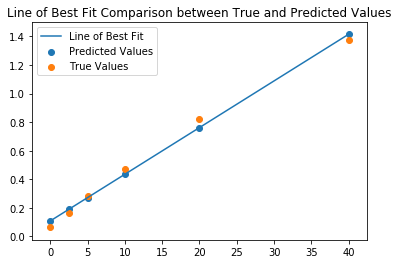

In [6]:
# This is to get line of best fit
y_vals = np.array(get_y_vals(df)) # user input
x_vals = np.array([0, 2.5, 5, 10, 20, 40]) # these values are set intervals that are used in a western blot

def mean(array):
    """This is to get the mean of an array"""
    return sum(array) / len(array)

def linear_coefficients(X, Y):
    """
    Returns m, b used for the equation Y = mX + b.
    
    Parameters:
    X (Array): an array of floats used as the X Values
    Y (Array): an array of floats used as the Y values
    
    Output:
    Generates the linear coefficients to be used in linear regression model.
    
    Equation pulled from: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/#FindaLinear
    """
    n_count = len(X)

    m = ((n_count * sum(X * Y)) - (sum(X) * sum(Y))) / ((n_count * sum(X ** 2)) - (sum(X) ** 2))
    b = ((sum(Y) * sum(X**2)) - (sum(X) * sum(X * Y))) / ((n_count * sum(X ** 2)) - (sum(X) ** 2))    
    return m, b

def predict(m, b, x):
    """Generates predicted values."""
    return m * x + b

# Generates the linear coefficients
m, b = linear_coefficients(x_vals, y_vals)


def r2_score(pred_y, true_y):
    """
    Finds the r2 score
    Equation pulled from http://brokerstir.com/r-squared-value-explained/
    """
    RSS = sum((true_y - pred_y) ** 2)
    TSS = sum((true_y - mean(true_y)) ** 2)
    return (1 - RSS) / (TSS)

# Equation/r2 Print
predicted_vals = [predict(m, b, x) for x in x_vals]

print("Y = " + str(round(m, 3)) + "X + " + str(round(b, 3)))
print("R**2: " + str(r2_score(predicted_vals, y_vals)))

# Plot
plt.scatter(x_vals, predicted_vals, label="Predicted Values")
plt.plot(x_vals, predicted_vals, label="Line of Best Fit")
plt.scatter(x_vals, y_vals, label="True Values")
plt.legend()
plt.title("Line of Best Fit Comparison between True and Predicted Values")
plt.show()

In [50]:
def raw_data_to_protein_values (m, b, a = 25):
    """
    Converts raw data into values that will be loaded as protein.
    
    Parameters:
    m = slope
    b = y-intercept
    a = amount (in micrograms) to be loaded - integer input (can be changed according to number of micrograms)
    
    Output:
    List of values
    
    """
    protein_analysis = []
    for data in df.iloc[2]: #NEED TO CALCULATE ALL 96 WELLS
        protein_analysis.append(a / ((data-b) / m ) / 2)    
    
    return protein_analysis

print("To load 25 ug of protein use: ", raw_data_to_protein_values(m,b,25))

To load 25 ug of protein use:  [2.8954444708070812, 3.051243161184247, 3.2530247443029934, 3.3823819108062363, 2.9669844272105537, 2.8039729012762575, 0.7050189008117991, 0.7051406639316561, 0.7117789182655266, 1.183741206512218, 1.2064779764759583, 1.1471555372787707]


# Extra Credit:
I believe this project goes beyond the scope of what was learned in class. Having only elementary knowledge of Java, having taken AP Computer Science in high school, the usage of an Excel data sheet to import data proved to be a challenge in getting the data in a way that could be mathematically manipulated to get the results that I needed.